## 代码复现与参考答案

In [1]:
# 导入包
# 用于加载波士顿房价数据集
from sklearn.datasets import load_boston 
# pandas工具包 对于pandas陌生的同学可以参考官方10分钟上手教程：https://pandas.pydata.org/pandas-docs/stable/10min.html
import pandas as pd 
# seaborn 用于画图
import seaborn as sns
import numpy as np # numpy
# 显示画图
%matplotlib inline

In [2]:
data = load_boston() # 加载数据集

In [3]:
data.keys() # data的里面的字段

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
dataframe = pd.DataFrame(data['data'])
dataframe.head(5) # 查看dataframe的前5行，我们可以看到列名是数字

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
data['feature_names'] # 特征名称

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

表 ：波士顿房价数据集缩写特征的中文描述
```
名称	中文描述
CRIM	住房所在城镇的人均犯罪率
ZN	住房用地超过 25000 平方尺的比例
INDUS	住房所在城镇非零售商用土地的比例
CHAS	有关查理斯河的虚拟变量（如果住房位于河边则为1,否则为0 ）
NOX	一氧化氮浓度
RM	每处住房的平均房间数
AGE	建于 1940 年之前的业主自住房比例
DIS	住房距离波士顿五大中心区域的加权距离
RAD	离住房最近的公路入口编号
TAX 每 10000 美元的全额财产税金额
PTRATIO	
住房所在城镇的师生比例
B	1000(Bk-0.63)^2,其中 Bk 指代城镇中黑人的比例
LSTAT	弱势群体人口所占比例
MEDV	业主自住房的中位数房价（以千美元计）
```

In [6]:
dataframe.columns = data['feature_names'] # 将数字列名替换为特征的名字
dataframe.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
dataframe['price'] = data['target'] # target为房价，也是我们的目标值，我们将目标值赋值给dataframe
dataframe.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


<AxesSubplot:>

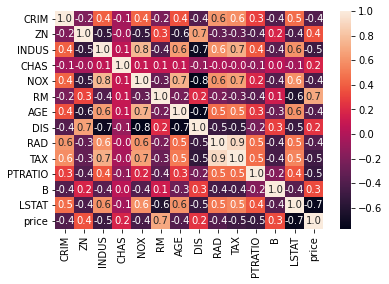

In [8]:
sns.heatmap(dataframe.corr(), annot=True, fmt='.1f') # 查看特征与price的相关性系数，正相关和负相关

In [9]:
import matplotlib.pyplot as plt

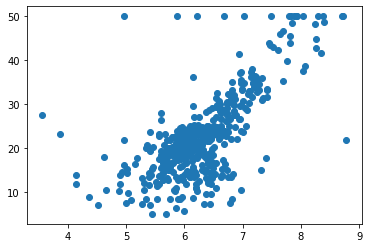

In [10]:
plt.scatter(dataframe['RM'], dataframe['price'])

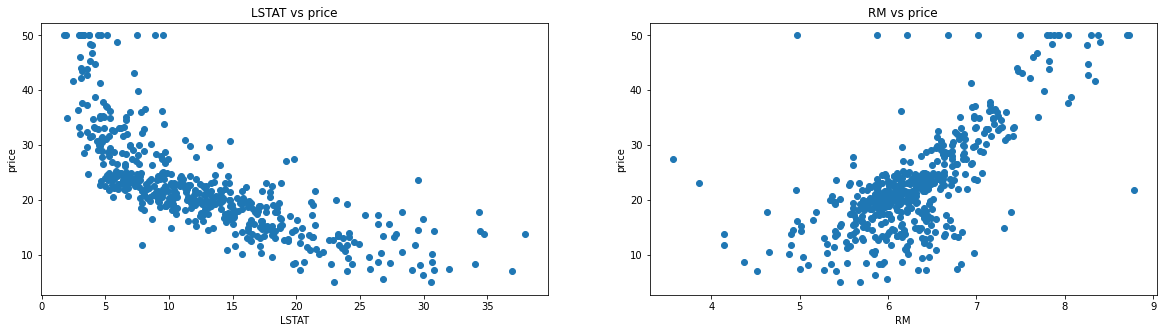

In [11]:
# 查看部分特征与price的数据分布展示 
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = dataframe['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = dataframe[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title('{} vs price'.format(col))
    plt.xlabel(col)
    plt.ylabel('price')

In [12]:
# 简单实例：单变量预测价格

In [13]:
x = dataframe['RM'] 

In [14]:
y = dataframe['price']

In [15]:
history_notes = {_x : _y for _x, _y in zip(x, y)}

In [16]:
history_notes[6.575]

24.0

In [17]:
# 寻找与RM：6.57最相近的前三个价格，
similary_ys = [y for _, y in sorted(history_notes.items(), key=lambda x_y: (x_y[0] - 6.57) ** 2)[:3]]
similary_ys

[23.8, 24.0, 24.8]

In [18]:
np.mean(similary_ys) # 计算三个的平均值

24.2

## 用历史数据来预测未曾见到的过的数据，最直接的方法

## K-Neighbor-Nearst

In [19]:
def knn(query_x, history, top_n=3):
    sorted_notes = sorted(history.items(), key=lambda x_y: (x_y[0] - query_x) ** 2) 
    similar_notes = sorted_notes[:top_n]
    similar_ys = [y for _, y in similar_notes]
    
    return np.mean(similar_ys)

In [20]:
knn(5.4, history_notes)

15.700000000000001

## 为了更快的获得结果，我们希望通过拟合函数来获得预测能力

$$ f(rm) = k * rm + b $$ 

## Random Approach

$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} (\hat{y_i} - y_i) ^ 2 $$
$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} ((k * rm_i + b) - y_i) ^ 2 $$

In [21]:
def loss(y_hat, y):
    return np.mean((y_hat - y) ** 2)

In [22]:
import random

In [23]:
min_loss = float('inf')
best_k, bes_b = None, None

for step in range(1000):
    min_v, max_v = -100, 100
    k, b = random.randrange(min_v, max_v), random.randrange(min_v, max_v)
    y_hats = [k * rm_i  + b for rm_i in x]
    current_loss = loss(y_hats, y)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('在第{}步，我们获得了函数 f(rm) = {} * rm + {}, 此时loss是: {}'.format(step, k, b, current_loss))

在第0步，我们获得了函数 f(rm) = 16 * rm + -46, 此时loss是: 1092.4098972964425
在第16步，我们获得了函数 f(rm) = 0 * rm + 31, 此时loss是: 156.11292490118578
在第31步，我们获得了函数 f(rm) = 12 * rm + -45, 此时loss是: 109.87672958102767
在第56步，我们获得了函数 f(rm) = 10 * rm + -37, 此时loss是: 54.977297826086954
在第185步，我们获得了函数 f(rm) = 8 * rm + -30, 此时loss是: 49.28732452173914
在第859步，我们获得了函数 f(rm) = 12 * rm + -52, 此时loss是: 48.51744104347825


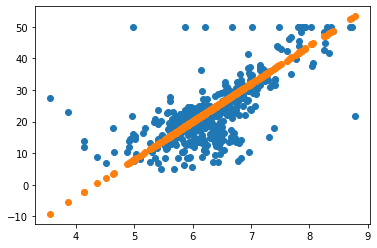

In [24]:
plt.scatter(x, y)
plt.scatter(x, [best_k * rm + best_b for rm in x])

## 蒙特卡洛模拟

## Supervisor

$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} ((k * rm_i + b) - y_i) ^ 2 $$

$$ \frac{\partial{loss(k, b)}}{\partial{k}} = \frac{2}{n}\sum_{i \in N}(k * rm_i + b - y_i) * rm_i $$

$$ \frac{\partial{loss(k, b)}}{\partial{b}} = \frac{2}{n}\sum_{i \in N}(k * rm_i + b - y_i)$$

In [25]:
def partial_k(k, b, x, y):
    return 2 * np.mean((k * x + b - y) * x)

def partial_b(k, b, x, y):
    return 2 * np.mean(k * x + b - y)

k, b = random.random(), random.random()
min_loss = float('inf')
best_k, bes_b = None, None
learning_rate = 1e-2

for step in range(2000):
    k, b = k + (-1 * partial_k(k, b, x, y) * learning_rate), b + (-1 * partial_b(k, b, x, y) * learning_rate)
    y_hats = k * x + b
    current_loss = loss(y_hats, y)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('在第{}步，我们获得了函数 f(rm) = {} * rm + {}, 此时loss是: {}'.format(step, k, b, current_loss))

在第0步，我们获得了函数 f(rm) = 2.966359362701529 * rm + 1.0957679908672742, 此时loss是: 69.95879077846313
在第1步，我们获得了函数 f(rm) = 3.378075490541446 * rm + 1.1516590764106034, 此时loss是: 59.766348191490906
在第2步，我们获得了函数 f(rm) = 3.4534815200431757 * rm + 1.1546826335460647, 此时loss是: 59.427084008807135
在第3步，我们获得了函数 f(rm) = 3.468198786712944 * rm + 1.1481677330184121, 此时loss是: 59.408678710582976
在第4步，我们获得了函数 f(rm) = 3.471964257659144 * rm + 1.1399332776972997, 此时loss是: 59.400725283425274
在第5步，我们获得了函数 f(rm) = 3.4737531666280876 * rm + 1.1313902193187482, 此时loss是: 59.39311574370491
在第6步，我们获得了函数 f(rm) = 3.475185130337475 * rm + 1.1227931693313264, 此时loss是: 59.3855209369913
在第7步，我们获得了函数 f(rm) = 3.4765524151347083 * rm + 1.114188072976264, 此时loss是: 59.37793014311855
在第8步，我们获得了函数 f(rm) = 3.47790776170962 * rm + 1.105583220847223, 此时loss是: 59.37034301130005
在第9步，我们获得了函数 f(rm) = 3.479260687393736 * rm + 1.0969801086069333, 此时loss是: 59.3627595284147
在第10步，我们获得了函数 f(rm) = 3.48061290969152 * rm + 1.0883790057458909, 此时

在第90步，我们获得了函数 f(rm) = 3.5877371983600628 * rm + 0.4069488833292877, 此时loss是: 58.76045458218422
在第91步，我们获得了函数 f(rm) = 3.5890632518247885 * rm + 0.3985137007530198, 此时loss是: 58.75316438654592
在第92步，我们获得了函数 f(rm) = 3.5903889864104364 * rm + 0.39008054660419955, 此时loss是: 58.745877696665744
在第93步，我们获得了函数 f(rm) = 3.5917144021936878 * rm + 0.38164942039504646, 此时loss是: 58.73859451085782
在第94步，我们获得了函数 f(rm) = 3.5930394992512054 * rm + 0.37322032163789726, 此时loss是: 58.73131482743709
在第95步，我们获得了函数 f(rm) = 3.594364277659634 * rm + 0.3647932498452059, 此时loss是: 58.72403864471929
在第96步，我们获得了函数 f(rm) = 3.5956887374956 * rm + 0.35636820452954376, 此时loss是: 58.716765961021
在第97步，我们获得了函数 f(rm) = 3.5970128788357116 * rm + 0.3479451852035993, 此时loss是: 58.70949677465956
在第98步，我们获得了函数 f(rm) = 3.598336701756558 * rm + 0.33952419138017814, 此时loss是: 58.702231083953166
在第99步，我们获得了函数 f(rm) = 3.59966020633471 * rm + 0.3311052225722031, 此时loss是: 58.69496888722081
在第100步，我们获得了函数 f(rm) = 3.60098339264672 * rm + 0.322

在第179步，我们获得了函数 f(rm) = 3.704515889676813 * rm + -0.33589415315252824, 此时loss是: 58.12516622815662
在第180步，我们获得了函数 f(rm) = 3.705813861105302 * rm + -0.3441507025823436, 此时loss是: 58.11818153423857
在第181步，我们获得了函数 f(rm) = 3.7071115204076643 * rm + -0.3524052665410283, 此时loss是: 58.11120019916694
在第182步，我们获得了函数 f(rm) = 3.7084088676589566 * rm + -0.36065784550603314, 此时loss是: 58.10422222132648
在第183步，我们获得了函数 f(rm) = 3.7097059029342194 * rm + -0.368908439954694, 此时loss是: 58.09724759910277
在第184步，我们获得了函数 f(rm) = 3.711002626308473 * rm + -0.3771570503642322, 此时loss是: 58.09027633088212
在第185步，我们获得了函数 f(rm) = 3.712299037856722 * rm + -0.38540367721175395, 此时loss是: 58.08330841505163
在第186步，我们获得了函数 f(rm) = 3.713595137653951 * rm + -0.39364832097425095, 此时loss是: 58.07634384999921
在第187步，我们获得了函数 f(rm) = 3.714890925775128 * rm + -0.4018909821286002, 此时loss是: 58.069382634113495
在第188步，我们获得了函数 f(rm) = 3.7161864022952025 * rm + -0.41013166115156385, 此时loss是: 58.06242476578391
在第189步，我们获得了函数 f(rm) = 3.717481

在第312步，我们获得了函数 f(rm) = 3.8744347931167704 * rm + -1.4167683500094843, 此时loss是: 57.22507632294281
在第313步，我们获得了函数 f(rm) = 3.8756919037619286 * rm + -1.4247649791745578, 此时loss是: 57.218524470289175
在第314步，我们获得了函数 f(rm) = 3.876948712106844 * rm + -1.4327596853721152, 此时loss是: 57.21197576833434
在第315步，我们获得了函数 f(rm) = 3.878205218224212 * rm + -1.4407524690645768, 此时loss是: 57.20543021556317
在第316步，我们获得了函数 f(rm) = 3.8794614221867096 * rm + -1.4487433307142517, 此时loss是: 57.19888781046128
在第317步，我们获得了函数 f(rm) = 3.880717324066997 * rm + -1.456732270783338, 此时loss是: 57.19234855151499
在第318步，我们获得了函数 f(rm) = 3.8819729239377163 * rm + -1.4647192897339223, 此时loss是: 57.18581243721136
在第319步，我们获得了函数 f(rm) = 3.883228221871492 * rm + -1.4727043880279804, 此时loss是: 57.17927946603817
在第320步，我们获得了函数 f(rm) = 3.884483217940933 * rm + -1.480687566127377, 此时loss是: 57.17274963648393
在第321步，我们获得了函数 f(rm) = 3.8857379122186284 * rm + -1.4886688244938657, 此时loss是: 57.16622294703787
在第322步，我们获得了函数 f(rm) = 3.88699230477

在第412步，我们获得了函数 f(rm) = 3.998661157953713 * rm + -2.206986916650807, 此时loss是: 56.585244851116016
在第413步，我们获得了函数 f(rm) = 3.9998883956037243 * rm + -2.214793520168453, 此时loss是: 56.57900068490755
在第414步，我们获得了函数 f(rm) = 4.0011153381371205 * rm + -2.2225982464144804, 此时loss是: 56.57275952143558
在第415步，我们获得了函数 f(rm) = 4.002341985624868 * rm + -2.230401095840321, 此时loss是: 56.56652135925611
在第416步，我们获得了函数 f(rm) = 4.003568338137918 * rm + -2.2382020688972983, 此时loss是: 56.56028619692587
在第417步，我们获得了函数 f(rm) = 4.004794395747203 * rm + -2.2460011660366264, 此时loss是: 56.55405403300227
在第418步，我们获得了函数 f(rm) = 4.00602015852364 * rm + -2.2537983877094114, 此时loss是: 56.54782486604339
在第419步，我们获得了函数 f(rm) = 4.007245626538126 * rm + -2.2615937343666515, 此时loss是: 56.54159869460809
在第420步，我们获得了函数 f(rm) = 4.008470799861547 * rm + -2.2693872064592355, 此时loss是: 56.5353755172558
在第421步，我们获得了函数 f(rm) = 4.009695678564764 * rm + -2.277178804437945, 此时loss是: 56.529155332546736
在第422步，我们获得了函数 f(rm) = 4.010920262718627 *

在第512步，我们获得了函数 f(rm) = 4.119935504519157 * rm + -2.9784273467004003, 此时loss是: 55.975460982842975
在第513步，我们获得了函数 f(rm) = 4.121133579052538 * rm + -2.986048440191631, 此时loss是: 55.96951005358678
在第514步，我们获得了函数 f(rm) = 4.122331365482225 * rm + -2.9936677010212587, 此时loss是: 55.96356198605331
在第515步，我们获得了函数 f(rm) = 4.123528863877497 * rm + -3.0012851296299883, 此时loss是: 55.95761677886639
在第516步，我们获得了函数 f(rm) = 4.1247260743076195 * rm + -3.0089007264584176, 此时loss是: 55.95167443065056
在第517步，我们获得了函数 f(rm) = 4.12592299684184 * rm + -3.016514491947039, 此时loss是: 55.94573494003095
在第518步，我们获得了函数 f(rm) = 4.127119631549389 * rm + -3.0241264265362395, 此时loss是: 55.93979830563338
在第519步，我们获得了函数 f(rm) = 4.128315978499482 * rm + -3.0317365306662993, 此时loss是: 55.93386452608435
在第520步，我们获得了函数 f(rm) = 4.129512037761316 * rm + -3.039344804777393, 此时loss是: 55.92793360001096
在第521步，我们获得了函数 f(rm) = 4.130707809404071 * rm + -3.0469512493095894, 此时loss是: 55.922005526041055
在第522步，我们获得了函数 f(rm) = 4.131903293496913 

在第624步，我们获得了函数 f(rm) = 4.2523446872656026 * rm + -3.8206977837157967, 此时loss是: 55.32643578712854
在第625步，我们获得了函数 f(rm) = 4.253510921063093 * rm + -3.8281163345285085, 此时loss是: 55.320796965457056
在第626步，我们获得了函数 f(rm) = 4.254676874413702 * rm + -3.835533101385514, 此时loss是: 55.315160855419926
在第627步，我们获得了函数 f(rm) = 4.255842547384869 * rm + -3.8429480847158053, 此时loss是: 55.309527455713145
在第628步，我们获得了函数 f(rm) = 4.257007940044019 * rm + -3.8503612849482707, 此时loss是: 55.30389676503335
在第629步，我们获得了函数 f(rm) = 4.258173052458558 * rm + -3.8577727025116957, 此时loss是: 55.298268782077834
在第630步，我们获得了函数 f(rm) = 4.259337884695877 * rm + -3.865182337834763, 此时loss是: 55.29264350554446
在第631步，我们获得了函数 f(rm) = 4.2605024368233515 * rm + -3.8725901913460525, 此时loss是: 55.28702093413175
在第632步，我们获得了函数 f(rm) = 4.26166670890834 * rm + -3.8799962634740397, 此时loss是: 55.28140106653887
在第633步，我们获得了函数 f(rm) = 4.262830701018185 * rm + -3.887400554647098, 此时loss是: 55.27578390146557
在第634步，我们获得了函数 f(rm) = 4.2639944132202

在第724步，我们获得了函数 f(rm) = 4.367590696652464 * rm + -4.553791249570283, 此时loss是: 54.77576779134701
在第725步，我们获得了函数 f(rm) = 4.36872921698121 * rm + -4.561033511737859, 此时loss是: 54.77039377859095
在第726步，我们获得了函数 f(rm) = 4.369867463527396 * rm + -4.568274032342259, 此时loss是: 54.76502235012611
在第727步，我们获得了函数 f(rm) = 4.3710054363568585 * rm + -4.57551281180228, 此时loss是: 54.7596535047098
在第728步，我们获得了函数 f(rm) = 4.37214313553542 * rm + -4.582749850536619, 此时loss是: 54.754287241099846
在第729步，我们获得了函数 f(rm) = 4.373280561128883 * rm + -4.589985148963871, 此时loss是: 54.74892355805469
在第730步，我们获得了函数 f(rm) = 4.37441771320304 * rm + -4.597218707502534, 此时loss是: 54.743562454333386
在第731步，我们获得了函数 f(rm) = 4.375554591823663 * rm + -4.604450526571001, 此时loss是: 54.73820392869554
在第732步，我们获得了函数 f(rm) = 4.376691197056511 * rm + -4.611680606587567, 此时loss是: 54.73284797990142
在第733步，我们获得了函数 f(rm) = 4.377827528967326 * rm + -4.618908947970425, 此时loss是: 54.72749460671183
在第734步，我们获得了函数 f(rm) = 4.3789635876218345 * rm + -4.

在第838步，我们获得了函数 f(rm) = 4.495634307023809 * rm + -5.368291765527868, 此时loss是: 54.17948086625647
在第839步，我们获得了函数 f(rm) = 4.4967420364157356 * rm + -5.375338162912701, 此时loss是: 54.174393599952175
在第840步，我们获得了函数 f(rm) = 4.497849499429467 * rm + -5.382382865834406, 此时loss是: 54.169308780046585
在第841步，我们获得了函数 f(rm) = 4.498956696129061 * rm + -5.389425874700453, 此时loss是: 54.16422640536326
在第842步，我们获得了函数 f(rm) = 4.500063626578559 * rm + -5.396467189918215, 此时loss是: 54.15914647472632
在第843步，我们获得了函数 f(rm) = 4.501170290841986 * rm + -5.403506811894968, 此时loss是: 54.154068986960475
在第844步，我们获得了函数 f(rm) = 4.502276688983352 * rm + -5.41054474103789, 此时loss是: 54.14899394089095
在第845步，我们获得了函数 f(rm) = 4.503382821066653 * rm + -5.417580977754061, 此时loss是: 54.1439213353436
在第846步，我们获得了函数 f(rm) = 4.5044886871558685 * rm + -5.424615522450461, 此时loss是: 54.13885116914478
在第847步，我们获得了函数 f(rm) = 4.5055942873149615 * rm + -5.431648375533975, 此时loss是: 54.13378344112146
在第848步，我们获得了函数 f(rm) = 4.506699621607882 * rm 

在第950步，我们获得了函数 f(rm) = 4.618058696661083 * rm + -6.147047755273587, 此时loss是: 53.624649197680576
在第951步，我们获得了函数 f(rm) = 4.619136986382919 * rm + -6.153906883442806, 此时loss是: 53.619828742546574
在第952步，我们获得了函数 f(rm) = 4.620215016805983 * rm + -6.160764362181948, 此时loss是: 53.615010605505304
在第953步，我们获得了函数 f(rm) = 4.621292787992632 * rm + -6.1676201918876545, 此时loss是: 53.61019478544207
在第954步，我们获得了函数 f(rm) = 4.622370300005205 * rm + -6.174474372956474, 此时loss是: 53.60538128124264
在第955步，我们获得了函数 f(rm) = 4.623447552906025 * rm + -6.181326905784856, 此时loss是: 53.60057009179337
在第956步，我们获得了函数 f(rm) = 4.6245245467574 * rm + -6.188177790769158, 此时loss是: 53.59576121598113
在第957步，我们获得了函数 f(rm) = 4.625601281621627 * rm + -6.195027028305641, 此时loss是: 53.590954652693306
在第958步，我们获得了函数 f(rm) = 4.626677757560984 * rm + -6.20187461879047, 此时loss是: 53.58615040081783
在第959步，我们获得了函数 f(rm) = 4.627753974637734 * rm + -6.208720562619714, 此时loss是: 53.5813484592432
在第960步，我们获得了函数 f(rm) = 4.628829932914129 * rm + -

在第1061步，我们获得了函数 f(rm) = 4.7361795785396685 * rm + -6.898428624310716, 此时loss是: 53.10348654580044
在第1062步，我们获得了函数 f(rm) = 4.737229463465665 * rm + -6.905107066221562, 此时loss是: 53.09891671085436
在第1063步，我们获得了函数 f(rm) = 4.738279095923456 * rm + -6.911783902152364, 此时loss是: 53.09434907348111
在第1064步，我们获得了函数 f(rm) = 4.739328475973755 * rm + -6.918459132489317, 此时loss是: 53.089783632623934
在第1065步，我们获得了函数 f(rm) = 4.740377603677258 * rm + -6.92513275761852, 此时loss是: 53.08522038722655
在第1066步，我们获得了函数 f(rm) = 4.741426479094646 * rm + -6.931804777925983, 此时loss是: 53.0806593362332
在第1067步，我们获得了函数 f(rm) = 4.74247510228659 * rm + -6.938475193797619, 此时loss是: 53.076100478588586
在第1068步，我们获得了函数 f(rm) = 4.74352347331374 * rm + -6.945144005619253, 此时loss是: 53.071543813237994
在第1069步，我们获得了函数 f(rm) = 4.744571592236737 * rm + -6.951811213776612, 此时loss是: 53.06698933912717
在第1070步，我们获得了函数 f(rm) = 4.745619459116203 * rm + -6.958476818655334, 此时loss是: 53.06243705520236
在第1071步，我们获得了函数 f(rm) = 4.74666707401274

在第1181步，我们获得了函数 f(rm) = 4.860380077661809 * rm + -7.688482656087779, 此时loss是: 52.57050436374921
在第1182步，我们获得了函数 f(rm) = 4.8614000958126455 * rm + -7.694971111917268, 此时loss是: 52.56619083284591
在第1183步，我们获得了函数 f(rm) = 4.862419868677409 * rm + -7.701458007453097, 此时loss是: 52.56187937626226
在第1184步，我们获得了函数 f(rm) = 4.8634393963150835 * rm + -7.707943343070474, 此时loss是: 52.557569993000754
在第1185步，我们获得了函数 f(rm) = 4.864458678784639 * rm + -7.7144271191445135, 此时loss是: 52.55326268206433
在第1186步，我们获得了函数 f(rm) = 4.8654777161450316 * rm + -7.720909336050244, 此时loss是: 52.54895744245645
在第1187步，我们获得了函数 f(rm) = 4.866496508455204 * rm + -7.727389994162603, 此时loss是: 52.54465427318104
在第1188步，我们获得了函数 f(rm) = 4.867515055774083 * rm + -7.733869093856437, 此时loss是: 52.5403531732425
在第1189步，我们获得了函数 f(rm) = 4.868533358160583 * rm + -7.7403466355065005, 此时loss是: 52.536054141645714
在第1190步，我们获得了函数 f(rm) = 4.8695514156736035 * rm + -7.746822619487462, 此时loss是: 52.531757177396045
在第1191步，我们获得了函数 f(rm) = 4.870569

在第1287步，我们获得了函数 f(rm) = 4.967148293822026 * rm + -8.367647878765919, 此时loss是: 52.12462359641979
在第1288步，我们获得了函数 f(rm) = 4.9681426371782464 * rm + -8.373973014196979, 此时loss是: 52.12052448364738
在第1289步，我们获得了函数 f(rm) = 4.96913674142247 * rm + -8.380296628608406, 此时loss是: 52.116427342083796
在第1290步，我们获得了函数 f(rm) = 4.970130606612195 * rm + -8.386618722365961, 此时loss是: 52.112332170781094
在第1291步，我们获得了函数 f(rm) = 4.971124232804908 * rm + -8.392939295835319, 此时loss是: 52.10823896879181
在第1292步，我们获得了函数 f(rm) = 4.972117620058082 * rm + -8.399258349382068, 此时loss是: 52.10414773516893
在第1293步，我们获得了函数 f(rm) = 4.973110768429174 * rm + -8.405575883371707, 此时loss是: 52.10005846896588
在第1294步，我们获得了函数 f(rm) = 4.97410367797563 * rm + -8.411891898169648, 此时loss是: 52.09597116923656
在第1295步，我们获得了函数 f(rm) = 4.975096348754879 * rm + -8.418206394141214, 此时loss是: 52.09188583503532
在第1296步，我们获得了函数 f(rm) = 4.976088780824339 * rm + -8.42451937165164, 此时loss是: 52.087802465416964
在第1297步，我们获得了函数 f(rm) = 4.9770809742414

在第1382步，我们获得了函数 f(rm) = 5.060551192601603 * rm + -8.961794740348985, 此时loss是: 51.743879561528146
在第1383步，我们获得了函数 f(rm) = 5.061523075151332 * rm + -8.967976999939353, 此时loss是: 51.7399635434983
在第1384步，我们获得了函数 f(rm) = 5.0624947239902625 * rm + -8.974157772867764, 此时loss是: 51.73604940862945
在第1385步，我们获得了函数 f(rm) = 5.063466139174598 * rm + -8.980337059491719, 此时loss是: 51.73213715601601
在第1386步，我们获得了函数 f(rm) = 5.0644373207605256 * rm + -8.986514860168631, 此时loss是: 51.728226784752806
在第1387步，我们获得了函数 f(rm) = 5.0654082688042195 * rm + -8.992691175255832, 此时loss是: 51.724318293935134
在第1388步，我们获得了函数 f(rm) = 5.0663789833618385 * rm + -8.998866005110562, 此时loss是: 51.72041168265872
在第1389步，我们获得了函数 f(rm) = 5.0673494644895305 * rm + -9.00503935008998, 此时loss是: 51.71650695001971
在第1390步，我们获得了函数 f(rm) = 5.068319712243429 * rm + -9.011211210551158, 此时loss是: 51.712604095114706
在第1391步，我们获得了函数 f(rm) = 5.0692897266796555 * rm + -9.01738158685108, 此时loss是: 51.70870311704071
在第1392步，我们获得了函数 f(rm) = 5.0702595

在第1492步，我们获得了函数 f(rm) = 5.166069228510709 * rm + -9.633007418916439, 此时loss是: 51.3242141732861
在第1493步，我们获得了函数 f(rm) = 5.167015736899496 * rm + -9.639028270474661, 此时loss是: 51.32049996676001
在第1494步，我们获得了函数 f(rm) = 5.167962017679268 * rm + -9.645047674185081, 此时loss是: 51.31678754634643
在第1495步，我们获得了函数 f(rm) = 5.168908070904759 * rm + -9.651065630395866, 此时loss是: 51.31307691118647
在第1496步，我们获得了函数 f(rm) = 5.169853896630689 * rm + -9.657082139455099, 此时loss是: 51.30936806042159
在第1497步，我们获得了函数 f(rm) = 5.1707994949117655 * rm + -9.66309720171078, 此时loss是: 51.305660993193726
在第1498步，我们获得了函数 f(rm) = 5.171744865802683 * rm + -9.669110817510825, 此时loss是: 51.30195570864519
在第1499步，我们获得了函数 f(rm) = 5.172690009358123 * rm + -9.675122987203066, 此时loss是: 51.29825220591871
在第1500步，我们获得了函数 f(rm) = 5.173634925632753 * rm + -9.681133711135253, 此时loss是: 51.29455048415742
在第1501步，我们获得了函数 f(rm) = 5.174579614681227 * rm + -9.68714298965505, 此时loss是: 51.29085054250493
在第1502步，我们获得了函数 f(rm) = 5.175524076558188

在第1600步，我们获得了函数 f(rm) = 5.266988113631964 * rm + -10.274964356578053, 此时loss是: 50.93322686496928
在第1601步，我们获得了函数 f(rm) = 5.267910353828009 * rm + -10.280830835298369, 此时loss是: 50.929700679039705
在第1602步，我们获得了函数 f(rm) = 5.268832372250867 * rm + -10.286695903293268, 此时loss是: 50.926176188806046
在第1603步，我们获得了函数 f(rm) = 5.2697541689538685 * rm + -10.29255956090199, 此时loss是: 50.922653393452876
在第1604步，我们获得了函数 f(rm) = 5.27067574399033 * rm + -10.298421808463695, 此时loss是: 50.91913229216513
在第1605步，我们获得了函数 f(rm) = 5.271597097413555 * rm + -10.304282646317459, 此时loss是: 50.915612884128166
在第1606步，我们获得了函数 f(rm) = 5.272518229276838 * rm + -10.310142074802277, 此时loss是: 50.91209516852772
在第1607步，我们获得了函数 f(rm) = 5.2734391396334575 * rm + -10.316000094257065, 此时loss是: 50.908579144549904
在第1608步，我们获得了函数 f(rm) = 5.274359828536678 * rm + -10.321856705020654, 此时loss是: 50.90506481138128
在第1609步，我们获得了函数 f(rm) = 5.275280296039754 * rm + -10.327711907431796, 此时loss是: 50.901552168208724
在第1610步，我们获得了函数 f(rm) = 

在第1714步，我们获得了函数 f(rm) = 5.370707793772634 * rm + -10.934737481879095, 此时loss是: 50.54197015221533
在第1715步，我们获得了函数 f(rm) = 5.3716050922624206 * rm + -10.940445303462534, 此时loss是: 50.538632116435295
在第1716步，我们获得了函数 f(rm) = 5.372502174976807 * rm + -10.946151752473197, 此时loss是: 50.53529568587226
在第1717步，我们获得了函数 f(rm) = 5.3733990419676845 * rm + -10.95185682924115, 此时loss是: 50.53196085975431
在第1718步，我们获得了函数 f(rm) = 5.374295693286926 * rm + -10.957560534096377, 此时loss是: 50.5286276373099
在第1719步，我们获得了函数 f(rm) = 5.375192128986394 * rm + -10.963262867368787, 此时loss是: 50.525296017767815
在第1720步，我们获得了函数 f(rm) = 5.376088349117941 * rm + -10.968963829388208, 此时loss是: 50.521966000357274
在第1721步，我们获得了函数 f(rm) = 5.3769843537334046 * rm + -10.974663420484388, 此时loss是: 50.51863758430781
在第1722步，我们获得了函数 f(rm) = 5.37788014288461 * rm + -10.980361640986995, 此时loss是: 50.51531076884936
在第1723步，我们获得了函数 f(rm) = 5.3787757166233705 * rm + -10.98605849122562, 此时loss是: 50.51198555321222
在第1724步，我们获得了函数 f(rm) = 5.3

在第1818步，我们获得了函数 f(rm) = 5.462880535587012 * rm + -11.521059169836102, 此时loss是: 50.20327309289878
在第1819步，我们获得了函数 f(rm) = 5.463755669088936 * rm + -11.526625997316064, 此时loss是: 50.200097932029955
在第1820步，我们获得了函数 f(rm) = 5.464630592145526 * rm + -11.53219148612842, 此时loss是: 50.196924298053794
在第1821步，我们获得了函数 f(rm) = 5.465505304807388 * rm + -11.537755636595085, 此时loss是: 50.19375219023597
在第1822步，我们获得了函数 f(rm) = 5.466379807125116 * rm + -11.54331844903789, 此时loss是: 50.190581607842624
在第1823步，我们获得了函数 f(rm) = 5.467254099149292 * rm + -11.548879923778598, 此时loss是: 50.18741255014017
在第1824步，我们获得了函数 f(rm) = 5.468128180930486 * rm + -11.554440061138886, 此时loss是: 50.18424501639542
在第1825步，我们获得了函数 f(rm) = 5.469002052519255 * rm + -11.559998861440356, 此时loss是: 50.18107900587553
在第1826步，我们获得了函数 f(rm) = 5.469875713966147 * rm + -11.565556325004534, 此时loss是: 50.177914517847995
在第1827步，我们获得了函数 f(rm) = 5.470749165321691 * rm + -11.571112452152871, 此时loss是: 50.174751551580655
在第1828步，我们获得了函数 f(rm) = 5.4

在第1927步，我们获得了函数 f(rm) = 5.557041962674879 * rm + -12.120031119501883, 此时loss是: 49.866015646294606
在第1928步，我们获得了函数 f(rm) = 5.557894452965291 * rm + -12.1254539108413, 此时loss是: 49.86300266804641
在第1929步，我们获得了函数 f(rm) = 5.558746738255434 * rm + -12.130875398149808, 此时loss是: 49.85999113869937
在第1930步，我们获得了函数 f(rm) = 5.559598818594603 * rm + -12.136295581740992, 此时loss是: 49.85698105755676
在第1931步，我们获得了函数 f(rm) = 5.560450694032085 * rm + -12.141714461928357, 此时loss是: 49.85397242392213
在第1932步，我们获得了函数 f(rm) = 5.561302364617151 * rm + -12.147132039025339, 此时loss是: 49.850965237099395
在第1933步，我们获得了函数 f(rm) = 5.562153830399064 * rm + -12.152548313345292, 此时loss是: 49.847959496392804
在第1934步，我们获得了函数 f(rm) = 5.563005091427073 * rm + -12.1579632852015, 此时loss是: 49.84495520110696
在第1935步，我们获得了函数 f(rm) = 5.563856147750416 * rm + -12.16337695490717, 此时loss是: 49.84195235054676
在第1936步，我们获得了函数 f(rm) = 5.564706999418319 * rm + -12.16878932277543, 此时loss是: 49.83895094401745
在第1937步，我们获得了函数 f(rm) = 5.5655576

In [26]:
best_k, best_b

(5.617900210804745, -12.50715761771833)

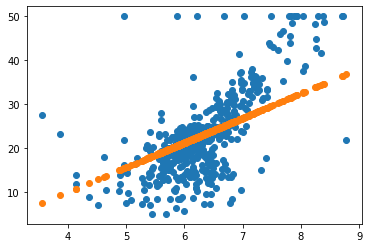

In [27]:
plt.scatter(x, y)
plt.scatter(x, [best_k * rm + best_b for rm in x])

## Supervised Learning

## 我们把房价的预测 变成更加负责，精细的模型，该怎么做？

$$ f(x) = k * x + b $$

$$ f(x) = k2 * \sigma(k_1 * x + b_1) + b2 $$

$$ \sigma(x) = \frac{1}{1 + e^(-x)} $$ 

In [28]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

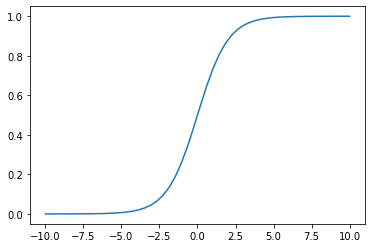

In [29]:
sub_x = np.linspace(-10, 10)
plt.plot(sub_x, sigmoid(sub_x))

In [30]:
def random_linear(x):
    k, b = random.random(), random.random()
    return k * x + b

In [31]:
def complex_function(x):
    return (random_linear(x))

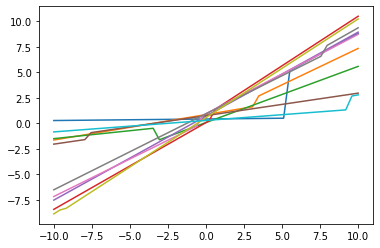

In [32]:
for _ in range(10):
    index = random.randrange(0, len(sub_x))
    sub_x_1, sub_x_2 = sub_x[:index], sub_x[index:]
    new_y = np.concatenate((complex_function(sub_x_1), complex_function(sub_x_2)))
    plt.plot(sub_x, new_y)

## 我们可以通过简单的、基本的模块，经过反复的叠加，来实现更加复杂的函数

## 面向越来越越复杂的函数？计算机如何求导？

## 1. 什么是机器学习？
## 2. KNN这种方法的缺陷，提出线性拟合的背景是什么
## 3. 怎么样通过监督的方法，来获得更快的函数权值更新
## 4. 非线性函数和线性函数的结合，可以拟合出非常复杂的函数
## 5. 深度学习我们可以通过基本的函数模块，来拟合更加复杂的函数

## Assigment:

$$ L2-Loss(y, \hat{y}) = \frac{1}{n}\sum{(\hat{y} - y)}^2 $$
$$ L1-Loss(y, \hat{y}) = \frac{1}{n}\sum{|(\hat{y} - y)|} $$


## 将课堂代码中的L2-Loss 变成L1Loss 并且实现梯度下降

从0开始实现L1Loss梯度下降

## 1 导入包

In [33]:
import numpy as np
import pandas as pd

## 2 加载数据集

In [34]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [35]:
X = boston.data
y = boston.target

In [36]:
boston = pd.DataFrame(boston.data, columns = boston.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
boston.describe() # 数据描述，可以查看每个每个变量的统计量

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## 3 数据预处理

归一化或者标准化首先在维数非常多的时候，可以防止某一维或某几维对数据影响过大，其次可以程序可以运行更快。方法很多，标准化，min-max,z-score,p范数等，具体怎么使用，要根据数据集的特征来选择。

[延伸阅读-数据标准化的迷思之深度学习领域](https://zhuanlan.zhihu.com/p/81560511)

In [38]:
from sklearn.preprocessing import StandardScaler
Scale = StandardScaler() # z = (x - u) / s u为均值，s为标准差
X = Scale.fit_transform(X) # 对于线性模型，一般需要做归一化或者标准化处理，否则会出现梯度爆炸，对于树模型一般不需要
X = pd.DataFrame(X, columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-5.616939e-17,6.319056e-17,-3.145486e-15,-2.106352e-17,2.752300e-15,-1.150770e-14,-1.137430e-15,7.582867e-16,5.616939e-17,5.616939e-17,-1.022283e-14,8.593916e-15,-5.897786e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


In [39]:
# y=Σwixi+b
# 因为b的求导都为1，给数据添加一个偏置b并且设置为1，当做数据的某一个特征并且进行梯度更新 wi*b=wi
X['bias']=1
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,bias
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,1
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,1
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,1
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,1
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,1
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,1


划分数据集，其中20%的数据用作测试集X_test,y_test,另外80%的数据用做训练集X_train,y_train，其中random_state为随机种子

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
print("X_train.shape,y_train.shape",X_train.shape,y_train.shape) # 打印数据条数
print("X_test.shape,y_test.shape",X_test.shape,y_test.shape)

X_train.shape,y_train.shape (404, 14) (404,)
X_test.shape,y_test.shape (102, 14) (102,)


In [42]:
X_train = np.array(X_train)

## 模型训练与梯度更新

In [43]:
def l1_cost(X, y, theta):
    """
    X:特征
    y：目标值
    theta:模型参数
    """
    k = X.shape[0]
    total_cost = 0
    for i in range(k):
        total_cost += 1/k * np.abs(y[i]-theta.dot(X[i,:]))
    return total_cost



def l2_cost(X, y, theta):
    k = X.shape[0]
    total_cost = 0
    for i in range(k):
        total_cost += 1/k * (y[i]-theta.dot(X[i,:]))**2
    return total_cost

In [44]:
np.zeros(10).shape

(10,)

In [45]:
def step_l1_gradient(X, y, learning_rate, theta):
    """
    计算MAE损失函数的梯度的函数
    对于0处的不可微分点返回梯度值0
    X:特征向量
    y：目标值
    learing_rate:学习率
    theta:参数
    """
    n = X.shape[0]
#     print(n)
    e = y - X @ theta
    gradients = -(X.T @ np.sign(e)) / n # sign为符号函数
    theta = theta - learning_rate * gradients
    return theta

In [46]:
def step_l2_gradient(X, y, learning_rate, theta):
    k = X.shape[0]
    n = X.shape[1]
    gradients = np.zeros(n)
    for i in range(k):
        for j in range(n):
            gradients[j] += (-2/k) * ( y[i] - (theta.dot(X[i,:])) ) * X[i,j]
    theta = theta - learning_rate * gradients
    return theta

In [47]:
# def step_gradient(X, y, learning_rate, theta):
#     """
#     X:特征向量
#     y：目标值
#     learing_rate:学习率
#     theta:参数
#     """
#     m_deriv = 0
#     N = len(X)
#     for i in range(N):
#         # 计算偏导
#         # -x(y - (mx + b)) / |mx + b|
#         m_deriv += - X[i] * (y[i] - (theta*X[i] + b)) / abs(y[i] - (theta*X[i] + b))
#     # We subtract because the derivatives point in direction of steepest ascent
#     theta -= (m_deriv / float(N)) * learning_rate
# #     theta = theta - learning_rate * gradients
#     return theta

In [48]:
def gradient_descent(X_train, y_train, learning_rate, iterations):
    k = X_train.shape[0]
    n = X_train.shape[1]
    theta = np.zeros(n)# 初始化参数 
    loss_values=[]
#     print(theta.shape)
    for i in range(iterations):
        theta = step_l1_gradient(X_train, y_train, learning_rate, theta)
        loss=l1_cost(X_train, y_train, theta)
        loss_values.append(loss)
        print(i, 'cost:', loss)
    return theta,loss_values

In [49]:
# 训练参数
learning_rate = 0.04 # 学习率
iterations = 300 # 迭代次数
theta ,loss_values= gradient_descent(X_train, y_train, learning_rate, iterations)

0 cost: 22.756180733143896
1 cost: 22.71582681282243
2 cost: 22.675472892500967
3 cost: 22.63511897217951
4 cost: 22.594765051858065
5 cost: 22.55441113153661
6 cost: 22.51405721121515
7 cost: 22.47370329089367
8 cost: 22.43334937057222
9 cost: 22.39299545025078
10 cost: 22.35264152992932
11 cost: 22.31228760960784
12 cost: 22.27193368928638
13 cost: 22.23157976896493
14 cost: 22.191225848643473
15 cost: 22.150871928322054
16 cost: 22.11051800800057
17 cost: 22.070164087679103
18 cost: 22.02981016735765
19 cost: 21.98945624703621
20 cost: 21.949102326714755
21 cost: 21.908748406393304
22 cost: 21.868394486071857
23 cost: 21.828040565750353
24 cost: 21.787686645428902
25 cost: 21.747332725107476
26 cost: 21.706978804785994
27 cost: 21.666624884464554
28 cost: 21.62627096414309
29 cost: 21.585917043821627
30 cost: 21.545563123500166
31 cost: 21.505209203178705
32 cost: 21.464855282857254
33 cost: 21.42450136253581
34 cost: 21.384147442214335
35 cost: 21.343793521892916
36 cost: 21.303439